#Productization and Deployment

In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
Bitcoin_2017 = pd.read_csv('/content/drive/My Drive/Technocolabs Internship Project/bitcoin_cash_price.csv')
Bitcoin_2017.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


In [ ]:
Bitcoin_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        213 non-null    object 
 1   Open        213 non-null    float64
 2   High        213 non-null    float64
 3   Low         213 non-null    float64
 4   Close       213 non-null    float64
 5   Volume      213 non-null    object 
 6   Market Cap  213 non-null    object 
dtypes: float64(4), object(3)
memory usage: 11.8+ KB


In [ ]:
Bitcoin_2017['Date'] = pd.to_datetime(Bitcoin_2017['Date'])

In [ ]:
Bitcoin_2017.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,2018-02-19,1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,2018-02-18,1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,2018-02-17,1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,2018-02-16,1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


In [ ]:
# creating a column `iso_week` by stripping the Year and Week from `date`
Bitcoin_2017['iso_week'] = Bitcoin_2017['Date'].apply(
    lambda x: x.strftime('%Y-%U'))

In [ ]:
Bitcoin_2017['week'] = Bitcoin_2017['Date'].apply(
    lambda x: x.strftime('%U'))

In [ ]:
Bitcoin_2017.head()

,Date,Open,High,Low,Close,Volume,Market Cap,iso_week,week
0,2018-02-20,1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000",2018-07,07
1,2018-02-19,1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000",2018-07,07
2,2018-02-18,1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000",2018-07,07
3,2018-02-17,1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000",2018-06,06
4,2018-02-16,1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000",2018-06,06


In [ ]:
# changing the dtypes
Bitcoin_2017['week']=Bitcoin_2017['week'].astype(int)
Bitcoin_2017['Date']=Bitcoin_2017['Date'].astype(str)

In [ ]:
# Removing the ',' from Volume and Market Cap
Bitcoin_2017['Volume'] = Bitcoin_2017['Volume'].apply(lambda x: x.replace(',', ''))
Bitcoin_2017['Market Cap'] = Bitcoin_2017['Market Cap'].apply(lambda x: x.replace(',', ''))

In [ ]:
Bitcoin_2017['Volume'] = Bitcoin_2017['Volume'].astype(int)

In [ ]:
Bitcoin_2017.head()

,Date,Open,High,Low,Close,Volume,Market Cap,iso_week,week
0,2018-02-20,1543.27,1569.03,1414.35,1418.73,820947000,26199800000,2018-07,7
1,2018-02-19,1483.34,1553.81,1483.34,1534.77,578906000,25179700000,2018-07,7
2,2018-02-18,1552.10,1641.40,1428.49,1487.46,907873000,26344200000,2018-07,7
3,2018-02-17,1548.48,1568.64,1517.14,1551.39,641719000,26280100000,2018-06,6
4,2018-02-16,1373.16,1558.66,1369.68,1552.20,961010000,23302000000,2018-06,6


In [ ]:
Bitcoin_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        213 non-null    object 
 1   Open        213 non-null    float64
 2   High        213 non-null    float64
 3   Low         213 non-null    float64
 4   Close       213 non-null    float64
 5   Volume      213 non-null    int64  
 6   Market Cap  213 non-null    object 
 7   iso_week    213 non-null    object 
 8   week        213 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 15.1+ KB


Def Functions using in this session

In [ ]:
"""
Series of normalization functions useful
for normalizing time-series data.
"""

def z_score(series):
    """
    Computes the normalized value using the Z-score
    technique. The Z-score is a technique used for
    normalizing Gaussian distributions representing
    each observation in relation to the distribution's
    mean and standard deviation. For precise definitions,
    see the Wikipedia article:
    
        https://en.wikipedia.org/wiki/Standard_score
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    Returns
    -------
    result: list
        List with the normalized results.
    """
    result = (series - series.mean()) / series.std(ddof=0)
    return result

def point_relative_normalization(series, reverse=False, last_value=None):
    """
    Computes the normalized value for the values of a
    given series by using the first element of the serie as p_0
    as a reference for each p_i.
    
    This technique comes from Siraj Raval's YouTube video
    "How to Predict Stock Prices Easily - Intro to Deep Learning #7",
    available at:
    
        https://www.youtube.com/watch?v=ftMq5ps503w
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    reverse: bool, default True
        If the method should de-normalize data.
    
    last_value: int or float
        Used to de-normalize a dataset. Needs to 
        be passed if `reverse` is True.
    
    Returns
    -------
    result: list
        List with the normalized results.
    """
    if reverse:
        result = last_value * (series + 1)
    else:
        result = (series / series[0]) - 1

    return result

def maximum_and_minimum_normalization(series, boundary=(0, 1)):
    """
    Computes the normalized value for the values of a
    given serie by using that series maximum and minimum
    values.
    
    This technique is a direct implementation from 
    scikit-learn, available at:
    
        http://scikit-learn.org/stable/modules/generated/\
            sklearn.preprocessing.MinMaxScaler.html
    
    Parameters
    ----------
    serie: list
        List with sequential values to use.
    
    boundary: set
        Maximum and minimum values used to
        scale the series.
        
    Returns
    -------
    result: list
        List with the normalized results.
    """
    range_min, range_max = boundary
    standard_deviation = (series - series.min(axis=0)) / (series.max(axis=0) - series.min(axis=0))
    result = standard_deviation * (range_max - range_min) + range_min
    return result


In [ ]:
"""
Helper class and methods for making manipulating
data for models.
"""
import numpy as np

#from cryptonic.models import normalizations


class ModelHelper:
    """
    Class with utility functions that aid in 
    the process of training LSTM models with Keras.

    """
    def __init__(self):
        pass

    def create_groups(self, data, start=0, group_size=7, normalize=True):
        """
        Creates distinct groups from a given continuous series.

        Parameters
        ----------
        data: np.array
            Series of continious observations.
        
        start: int
            Starting point for the series. This 
            is used to prune earlier observations
            from the series in case the series is
            too long or too short.

        group_size: int, default 7
            Determines how large the groups are. That is,
            how many observations each group contains.
        
        normalize: bool
            If the method should normalize data or not.
            Normalization is done using 

                point_relative_normalization()

        Returns
        -------
        A Numpy array object. 
        """
        samples = list()
        for i in range(0, len(data), group_size):
            sample = list(data[start + i:i + group_size])
            if len(sample) == group_size:
                if normalize:
                    sample = point_relative_normalization(sample)

                samples.append(np.array(sample).reshape(1, group_size).tolist())

        A = np.array(samples)
        return A.reshape(1, A.shape[0], group_size)

    def split_lstm_input(self, groups):
        """
        Splits groups in a format expected by 
        the LSTM layer. 
        
        Parameters
        ----------
        groups: np.array
            Numpy array with the organized sequences.
        
        Returns
        -------
        X, Y: np.array
            Numpy arrays with the shapes required by
            the LSTM layer. X with (1, a - 1, b)
            and Y with (1, b). Where a is the total
            number of groups in `group` and b the
            number of observations per group.
        """
        X = groups[0:,:-1].reshape(1, groups.shape[1] - 1, groups.shape[2])
        Y = groups[0:,-1:][0]

        return X, Y

    def normalize(self):
        """
        Normalizes a series using point-relative normalization.

        Parameters
        ----------

        Returns
        -------
        """
        point_relative_normalization()

    def denormalize(self, series, last_value):
        """
        De-normalizes a series using the latest
        value available from data.
        
        Parameters
        ----------
        series: numpy array
            Series with normalized values.
        
        last_value: float
            Numerical value that represents the
            last value from the dataset.
        
        Returns
        -------
        """
        result = last_value * (series + 1)
        return result

    def mape(self, A, B):
        """
        Calcualtes the mean absolute persentage error
        from two series. Original solution from:
        
            https://stats.stackexchange.com/questions/58391/\
                mean-absolute-percentage-error-mape-in-scikit-learn
        """
        return np.mean(np.abs((A - B) / (1 - A))) * 100

    def rmse(self, A, B):
        """
        Calculates the root mean square error from
        two series. Original solution from:

            https://stackoverflow.com/questions/16774849\
                /mean-squared-error-in-numpy
        """
        return np.sqrt(np.square(np.subtract(A, B)).mean())
    
    def mse(self, A, B):
        """
        Calculates the mean square error from
        two series. Original solution from:

            https://stackoverflow.com/questions/16774849\
                /mean-squared-error-in-numpy
        """
        return np.square(np.subtract(A, B)).mean()


In [ ]:
"""
Creates a deep learning model abstraction.
"""
from datetime import datetime, timedelta

from keras.models import load_model
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation

#from cryptonic.models.helper import ModelHelper
#from cryptonic.models.normalizations import point_relative_normalization


class Model(ModelHelper):
    """
    Class that encapsulates an LSTM model
    that we have been building. This class makes it
    easy to work with the different functions
    used to work with the model.
    
    Parameters
    ----------
    path: str
        Location to load model from.

    data: pandas DataFrame
        Pandas dataframe with the variable from
        `variable` privided. This is used
        to eventually train and run the model.
    
    variable: str
        Variable to use from `data`.
    
    predicted_period_size: int
        Number of predicted time periods predictions
        to make.
    
    holdout: int, default 0
        Number of periods to hold-out from the 
        training set.

    """
    def __init__(self, data, variable, predicted_period_size, path=None, 
                 holdout=0, normalize=True):

        self.path = path
        self.data = data
        self.variable = variable
        self.predicted_period_size = predicted_period_size
        self.holdout = holdout

        if path:
            self.model = load_model(self.path)

        self.X, self.Y = self.__prepare_data(normalize=normalize)
        self.__extract_last_series_value()

        super().__init__()

    def __extract_last_series_value(self):
        """
        Method for extracting the last value from
        a series prior to normalization. This value
        is then used for denormalizing the set.
        """
        if self.remainder:
            self.last_value = self.data.sort_values('date', ascending=False)\
                                [:-self.remainder][self.variable].values[0]
            
            self.last_date = self.data.sort_values('date', ascending=False)\
                                [:-self.remainder]['date'].values[0]
        else:
            self.last_value = self.data.sort_values('date', ascending=False)\
                                [self.variable].values[0]
            
            self.last_date = self.data.sort_values('date', ascending=False)\
                                ['date'].values[0]
    
    def __prepare_data(self, normalize):
        """
        Prepares data for model.

        Parameters
        ----------
        normalize: bool
            If the method should normalize data or not.
            Normalization is done using 

                point_relative_normalization()

        Returns
        -------
        X and Y prepared for training.
        """
        series = self.data[self.variable].values
        self.remainder = len(series) % self.predicted_period_size

        groups = self.create_groups(data=series, 
                                    group_size=self.predicted_period_size,
                                    normalize=normalize)
        
        if self.holdout == 0:
            self.holdout_groups = []
        else:
            self.holdout_groups = groups[::-self.holdout]
            groups = groups[::-self.holdout]

        self.default_number_of_periods = groups.shape[1] - 1

        return self.split_lstm_input(groups)

    def build(self, number_of_periods=None, period_length=7, batch_size=1):
        """
        Builds an LSTM model using Keras. This function
        works as a simple wrapper for a manually created
        model.
        
        Parameters
        ----------
        period_length: int
            The size of each observation used as input.
        
        number_of_periods: int, default None
            The number of periods available in the 
            dataset. If None, the model will be built
            using all available periods - 1 (used for validation).
        
        batch_size: int
            The size of the batch used in each training
            period.
        
        Returns
        -------
        model: Keras model
            Compiled Keras model that can be trained
            and stored in disk.
        """
        if not number_of_periods:
            number_of_periods = self.default_number_of_periods

        self.model = Sequential()
        self.model.add(LSTM(
            units=period_length,
            batch_input_shape=(batch_size, number_of_periods, period_length),
            input_shape=(number_of_periods, period_length),
            return_sequences=False, stateful=False))

        self.model.add(Dense(units=period_length))
        self.model.add(Activation("linear"))

        self.model.compile(loss="mse", optimizer="rmsprop")

        return self.model

    def save(self, path):
        """
        Stores trained model in disk. Useful
        for storing trained models.
        
        Parameters
        ----------
        path: str
            Location of where to store model.
        """
        return self.model.save(path)
    
    def predict(self, denormalized=False, return_dict=False):
        """
        Makes a prediction based on input data.

        Parameters
        ----------
        denormalized: bool, default True
            If method should denormalize data. Method
            will use the point_relative_normalization()
        
        return_dict: bool, default False
            If should return dict that can be serializable
            as JSON. Useful for returning prediction
            results with dates as keys.

        """
        predictions = self.model.predict(x=self.X)
        if denormalized:
            predictions = point_relative_normalization(series=predictions, 
                                                       reverse=True, 
                                                       last_value=self.last_value)
        
        dates = []
        base_date = datetime.strptime(self.last_date, "%Y-%m-%d")
        for i in range(1, len(predictions[0] + 1)):
            d = (base_date + timedelta(days=i)).strftime("%Y-%m-%d")
            dates.append(d)

        results = []
        for d,p in zip(dates, predictions[0].tolist()):
            results.append({
                'date': d,
                'prediction': round(p, 2)
            })
        
        if return_dict:
            return results
        
        else:
            return predictions[0]

    def train(self, data=None, epochs=300, verbose=0):
        """
        Trains model using data from class. 

        Parameters
        ----------
        X: pandas DataFrame
            Pandas dataframe with `variable` used to
            fir model for the fist time.

        epochs: int
            Number of epochs to train model for.
        
        verbose: int, default 0
            Verbosity level to use. The default (0)
            means that nothing is printed on the
            screen.
        
        Returns
        -------
        Metrics from the model history.
        """
        if data is not None:
            self.data = data
            self.X, self.Y = self.__prepare_data(normalize=self.normalize)
            self.__extract_last_series_value()

        self.train_history = self.model.fit(
            x=self.X, y=self.Y,
            batch_size=1, epochs=epochs,
            verbose=verbose, shuffle=False)
        #now = datetime.now()
        #self.last_trained = now.strftime('%Y-%m-%d %H:%M:%S')
        return self.train_history

    def evaluate(self, metrics=['mse', 'rmse', 'mape']):
        """
        Evaluates model using provided metrics. The evaluation
        """
        y = point_relative_normalization(series=self.Y[0], 
                                         reverse=True, 
                                         last_value=self.last_value)

        results = {}
        for metric in metrics:
            if metric == 'mse':
                r = round(
                        self.mse(A=self.Y[0], B=self.predict()), 2)

            else:
                r = round(
                        getattr(self, metric)(
                        A=self.predict(denormalized=True)[0], 
                        B=y), 2)

            results[metric] = r

        return results


In [ ]:
import pandas as pd
import numpy as np

import time
import pytz
import json

import math  

import datetime
from datetime import datetime, timedelta

from threading import Thread

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates



from sklearn import preprocessing, model_selection, neighbors, svm
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

from tqdm import tqdm as tqdm

In [ ]:
Bitcoin_2017.head()

,Date,Open,High,Low,Close,Volume,Market Cap,iso_week,week
0,2018-02-20,1543.27,1569.03,1414.35,1418.73,820947000,26199800000,2018-07,7
1,2018-02-19,1483.34,1553.81,1483.34,1534.77,578906000,25179700000,2018-07,7
2,2018-02-18,1552.10,1641.40,1428.49,1487.46,907873000,26344200000,2018-07,7
3,2018-02-17,1548.48,1568.64,1517.14,1551.39,641719000,26280100000,2018-06,6
4,2018-02-16,1373.16,1558.66,1369.68,1552.20,961010000,23302000000,2018-06,6


In [ ]:
Bitcoin_2017.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
iso_week      0
week          0
dtype: int64

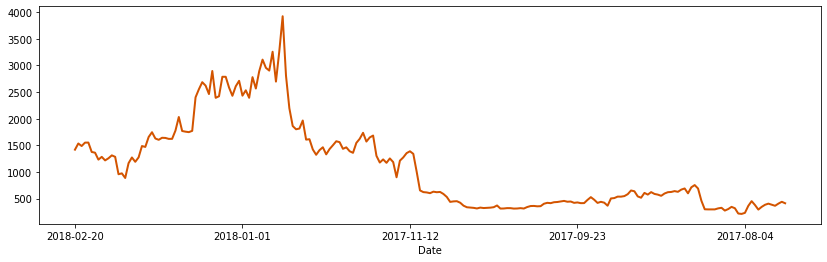

In [ ]:
#  Time-series plot for `close` variable
Bitcoin_2017.set_index('Date')['Close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

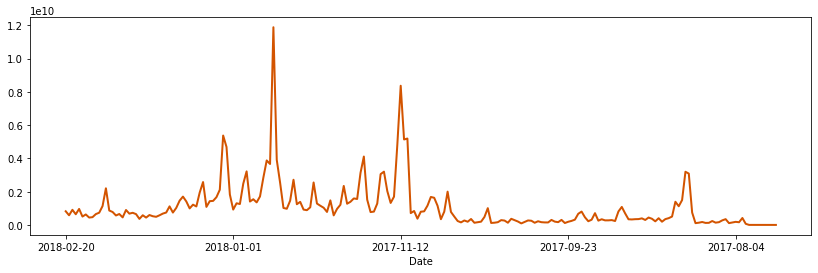

In [ ]:
#  Time-series plot for `Volume` variable
Bitcoin_2017.set_index('Date')['Volume'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

In [ ]:
#
#  Using the Pandas API, filter the dataframe
#  for observations from 2017 only. 
# 
#  Hint: use the `date` variable.
#

Bitcoin_2017 = Bitcoin_2017[Bitcoin_2017['Date'] >= '2017-01-01']

In [ ]:
#  Keep only the `close` and `volume` variables
model_data = Bitcoin_2017[['Date', 'iso_week', 'Close', 'Volume']]
model_data.columns = ['date', 'iso_week', 'close', 'volume']
model_data.head()

,date,iso_week,close,volume
0,2018-02-20,2018-07,1418.73,820947000
1,2018-02-19,2018-07,1534.77,578906000
2,2018-02-18,2018-07,1487.46,907873000
3,2018-02-17,2018-06,1551.39,641719000
4,2018-02-16,2018-06,1552.20,961010000


In [ ]:
#mean_close = model_data.close.dropna().mean()
#max_close = model_data.close.dropna().max()
#min_close = model_data.close.dropna().min()
#model_data['close_point_relative_normalization'] = model_data.groupby('iso_week')['close'].apply(lambda x: (x - mean_close ) / (max_close -min_close ))

In [ ]:
#mean_volume = model_data.volume.dropna().mean()
#max_volume = model_data.volume.dropna().max()
#min_volume = model_data.volume.dropna().min()
#model_data['volume_point_relative_normalization'] = model_data.groupby('iso_week')['volume'].apply(lambda x: (x - mean_volume ) / (max_volume -min_volume ))

In [ ]:
model_data.head()

,date,iso_week,close,volume
0,2018-02-20,2018-07,1418.73,820947000
1,2018-02-19,2018-07,1534.77,578906000
2,2018-02-18,2018-07,1487.46,907873000
3,2018-02-17,2018-06,1551.39,641719000
4,2018-02-16,2018-06,1552.20,961010000


## The `Model()` Class
We have also created the class `Model()` which compiles all the code we have written so far. We will use that class to build, train, and evaluate our model.

In [ ]:
M = Model(data=model_data,
          variable='close',
          predicted_period_size=7)

In [ ]:
M.build()

In [ ]:
M.train(epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 3/100
1/1 [==============================] - 0s 987us/step - loss: 0.0117
Epoch 4/100
1/1 [==============================] - 0s 942us/step - loss: 0.0110
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 8/100
1/1 [==============================] - 0s 945us/step - loss: 0.0089
Epoch 9/100
1/1 [==============================] - 0s 941us/step - loss: 0.0085
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 13/100
1/1 [==============================] - 0

We can now use the model for making predictions with the `predict()` method. The parameter `denormalized` will return values in the original scale of the data. In our case, US dollars.

In [ ]:
M.predict(denormalized=False)

array([-0.00285151, -0.23024562, -0.08907648,  0.01679505,  0.07045399,
        0.01351396, -0.03501853], dtype=float32)

We now evaluate our model to inspect the statistics for the last epoch of training compared to a single test week.

In [ ]:
M.evaluate()

{'mape': 6.47, 'mse': 0.0, 'rmse': 135.55}

Finally, we can now save the trained model on disk for later use.

In [ ]:
M.save('/content/drive/My Drive/Technocolabs Internship Project/Deployment/bitcoin_model_prod_v0.h5')

Our `Model()` class can also load a previously trained model when instantiated with the `path` parameter.

In [ ]:
M = Model(path='/content/drive/My Drive/Technocolabs Internship Project/Deployment/bitcoin_model_prod_v0.h5',
          data=model_data,
          variable='close',
          predicted_period_size=7)

In [ ]:
M.predict(denormalized=False)

array([-0.00285151, -0.23024562, -0.08907648,  0.01679505,  0.07045399,
        0.01351396, -0.03501853], dtype=float32)

## New Data, Re-train Old Model
One strategy discussed earlier regards the re-training of our model with new data. In our case, our biggest concern is to shape data in a way that the model has been configured. As an example, we will configure our model to predict a week using 40 weeks. We will first train the model with the first 40 weeks of 2017, then continue to re-train it over the following weeks until we reach week 50.

First, let's build a model with the first set of data. Notice how we use `7*40 + 7` as the indexer. This is because we use 40 weeks for training and 1 week for testing. 

In [ ]:
i=1
M1 = Model(data=model_data[i * 7:7 * (40 + i) + 7],variable='close',predicted_period_size=7)
M1.build()
M1.train()
results = [] 
for i in range(1, 10 + 1):
    M1.train(epochs=100, verbose=1)
    results.append(M1.evaluate())

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 6.7536e-06
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 6.3965e-06
Epoch 3/100
1/1 [==============================] - 0s 971us/step - loss: 7.3135e-06
Epoch 4/100
1/1 [==============================] - 0s 930us/step - loss: 8.6110e-06
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 1.0363e-05
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 9.0642e-06
Epoch 7/100
1/1 [==============================] - 0s 957us/step - loss: 7.8470e-06
Epoch 8/100
1/1 [==============================] - 0s 918us/step - loss: 5.7673e-06
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 5.3127e-06
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 4.8731e-06
Epoch 11/100
1/1 [==============================] - 0s 937us/step - loss: 5.5798e-06
Epoch 12/100
1/1 [==============================] - 0s 888us/step - loss: 5.9338e-06
E

In [ ]:
for i, result in enumerate(results):
    print(f'Week {40+i+1}: {result}')

Week 41: {'mse': 0.0, 'rmse': 118.46, 'mape': 6.43}
Week 42: {'mse': 0.0, 'rmse': 120.55, 'mape': 6.43}
Week 43: {'mse': 0.0, 'rmse': 118.51, 'mape': 6.43}
Week 44: {'mse': 0.0, 'rmse': 120.7, 'mape': 6.44}
Week 45: {'mse': 0.0, 'rmse': 118.61, 'mape': 6.43}
Week 46: {'mse': 0.0, 'rmse': 117.97, 'mape': 6.46}
Week 47: {'mse': 0.0, 'rmse': 120.0, 'mape': 6.43}
Week 48: {'mse': 0.0, 'rmse': 119.04, 'mape': 6.41}
Week 49: {'mse': 0.0, 'rmse': 117.84, 'mape': 6.46}
Week 50: {'mse': 0.0, 'rmse': 118.27, 'mape': 6.44}


In [ ]:
M1.predict(denormalized=True)

array([1230.0262,  956.0259, 1119.1423, 1244.4839, 1317.0518, 1246.7852,
       1185.5779], dtype=float32)

In [ ]:
old_data = model_data[0*7:7*48 + 7]
new_data = model_data[0*7:7*49 + 7]

In [ ]:
M2 = Model(data=old_data,
          variable='close',
          predicted_period_size=7)

In [ ]:
M2.build()
M2.train()

In [ ]:
M2.predict(denormalized=True)

array([1416.2346, 1100.9097, 1291.6093, 1437.0364, 1517.7031, 1435.0581,
       1364.0872], dtype=float32)

In [ ]:
M3 = Model(data=new_data,
          variable='close',
          predicted_period_size=7)

In [ ]:
M3.build()
M3.train()

In [ ]:
M3.predict(denormalized=True)

array([1419.1893, 1095.9204, 1288.2698, 1438.6698, 1517.9158, 1438.534 ,
       1362.2972], dtype=float32)

In [ ]:
M3.evaluate()

{'mape': 6.41, 'mse': 0.0, 'rmse': 137.21}